<a href="https://colab.research.google.com/github/Maldini2712/Equipo30_EntregaFinal/blob/master/Grupo30_Entrega4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font color="black" size="5">"Modelo de Rentabilidad para la
Exportación de Cerezas: Un Enfoque Basado en Datos"</font>

<font color="black" size="4">Victoria Ábalos Cerda - 20.308.552-4</font><br>
<font color="black" size="4">Valeria Maldini de la Fuente - 21.200.429-4</font><br>
<font color="black" size="4">Daniela Maripangui Figueroa - 21.283.899-3</font>


## **Objetivos**
* Aprender cómo la ciencia de datos puede aplicarse en la práctica.
* Saber cuáles exportaciones son las más rentables para que las empresas puedan priorizar la mejora y el mantenimiento de una alta calidad en los mercados clasificados como altamente rentables.
* Clasificar las exportaciones de cerezas en función de
su rentabilidad a partir de los datos relevantes desde
enero de 2021 hasta junio de 2024, utilizando técnicas
de aprendizaje automático para categorizar los
mercados en tres niveles de rentabilidad: baja, media y
alta.

Para comenzar, se exporta la biblioteca pandas, para facilitar el trabajo con datos tabulares presentes en el archivo CSV, el cual se importa por medio del módulo files de colab. El archivo se lee y se guarda como un DataFrame de pandas en la variable datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()
datos = pd.read_csv('CEREZASOFICIAL.csv', encoding='latin-1', sep=';')

Saving CEREZASOFICIAL.csv to CEREZASOFICIAL.csv


In [3]:
import numpy as np

A continuación, se muetra la información general del archivo, el número total de filas y columnas, los nombres de las columnas, el tipo de dato de cada atributo. El objetivo de esto es tener una visión rápida de la estructura del conjunto de los datos, con datos.head se muetran las 5 primeras filas de los datos

In [ ]:
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163471 entries, 0 to 163470
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   ï»¿Descripcion de la Partida Aduanera  163471 non-null  object
 1   Aduana                                 163470 non-null  object
 2   Exportador                             163471 non-null  object
 3   Qty                                    163471 non-null  object
 4   Und                                    163471 non-null  object
 5   Unidad Internacional                   138871 non-null  object
 6   U$ FOB Tot                             163471 non-null  int64 
 7   UFOB Und                               163471 non-null  object
 8   Pais de Destino                        163471 non-null  object
 9   Puerto de Destino                      163471 non-null  object
 10  Puerto de Embarque                     163471 non-null  object
 11  

,ï»¿Descripcion de la Partida Aduanera,Aduana,Exportador,Qty,Und,Unidad Internacional,U$ FOB Tot,UFOB Und,Pais de Destino,Puerto de Destino,...,Tipo de Bulto,Valor liquidado,Comisiones,Otros,Valor Clausula,Costos,C+Otros,Qty*USFOB UN,TotalExp,Rentabilidad
0,LAS DEMAS CEREZAS DULCES FRESCAS,METROPOLITANA,SOC SAN FRANCISCO LO GARCES LTDA,6.000.000,KN,KG,3772,"6,287",REINO UNIDO,OTROS PUERTOS DE INGLATERRA NO ESPECIFICADOS,...,PALLETS,76675562,0,48.151.441,124827000,30000000,78.151.441,37722000,"6,58426E+12",84249
1,LAS DEMAS CEREZAS DULCES FRESCAS,NaN,DAVID DEL CURTO SA,18.400.000,KN,KG,12512,"6,8",CHINA,SHANGHAI,...,CONTENEDOR REFRIGERADO 40 PIESÂ Â Â Â Â Â Â Â ...,213152000,0,16.074.000,229226000,3072800,46.074.000,125120000,"1,94242E+12",42158
2,LAS DEMAS CEREZAS DULCES FRESCAS,VALPARAISO,GEOFRUT S A,33.150.000,KN,KG,1723,"5,2",ESTADOS UNIDOS,ATLANTIC BEACH,...,CAJA DE CARTON,62400000,0,0,62400000,5536050,30.000.000,172380000,"2,00916E+12",66971
3,LAS DEMAS CEREZAS DULCES FRESCAS,METROPOLITANA,SOC SAN FRANCISCO LO GARCES LTDA,6.000.000,KN,KG,1196,"1,992","TAIWÃN, PROVINCIA DE CHINA",OTROS PUERTOS DE TAIWÃN NO ESPECIFICADOS,...,PALLETS,2160399,0,6.511.600,8672000,30000000,36.511.600,11952000,"6,58426E+12",180332
4,LAS DEMAS CEREZAS DULCES FRESCAS,METROPOLITANA,SOC SAN FRANCISCO LO GARCES LTDA,4.840.000,KN,KG,965,"1,992","TAIWÃN, PROVINCIA DE CHINA",OTROS PUERTOS DE TAIWÃN NO ESPECIFICADOS,...,PALLETS,2160399,0,6.511.600,8672000,24200000,36.511.600,9641280,"6,58426E+12",180332


Con el siguiente comando se detectan y cuentan los valores nulos de los datos

In [ ]:
print(datos.isnull().sum())

ï»¿Descripcion de la Partida Aduanera        0
Aduana                                       1
Exportador                                   0
Qty                                          0
Und                                          0
Unidad Internacional                     24600
U$ FOB Tot                                   0
UFOB Und                                     0
Pais de Destino                              0
Puerto de Destino                            0
Puerto de Embarque                           0
Via                                          0
Nave                                      3827
Tipo de Bulto                                4
Valor liquidado                              0
Comisiones                                   0
Otros                                        0
Valor Clausula                               0
Costos                                       0
C+Otros                                      0
Qty*USFOB UN                                 0
TotalExp     

Se puede apreciar que unidad internacional tiene muchos valores faltantes.

Con el comando datos.drop se eliminan columnas del DataFrame, los cuales no entregan mayor información y que no serán útiles para el desarrollo del proyecto.

In [ ]:
datos.drop(columns=['Unidad Internacional'], inplace=True)

A continuación, se cambia el formato de los números decimales, mostrando 2 decimales, con el fin de mejorar la legibilidad de los datos, especialmente al trabajar con grandes cantidades de números decimales.

Además, con datos.describe se generan estadísticas descriptivas sobre los datos, como la media, la desviación estándar, máximo y mínimo, cuartiles.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
datos.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ï»¿Descripcion de la Partida Aduanera,163471,9,LAS DEMAS CEREZAS DULCES FRESCAS,161344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aduana,163470,8,SAN ANTONIO,67009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exportador,163471,239,DOLE CHILE S A,17912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qty,163471,15536,184.000.000,5685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Und,163471,1,KN,163471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U$ FOB Tot,163471.00,NaN,NaN,NaN,40885.28,73714.24,-6127.00,5337.50,17850.00,55200.00,10464483.00
UFOB Und,163471,11765,4,14913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pais de Destino,163471,56,CHINA,134515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto de Destino,163471,76,HONG KONG,52331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto de Embarque,163471,12,SAN ANTONIO,67042,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora se hace un análisis estadístico de las variables númericas que tendrán importancia en el desarrollo del proyecto:

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
resumen = datos[['Qty','UFOB Und','Otros','TotalExp' ,'Rentabilidad', 'Costos', 'Qty*USFOB UN']]
resumen.describe().T

,count,mean,std,min,25%,50%,75%,max
Rentabilidad,163471.00,55652.86,53564.52,-1.00,13332.00,31734.00,71780.00,219474.00
Qty*USFOB UN,163471.00,371319972.67,608678562.34,-2371116.00,44710850.00,154880000.00,510389600.00,28791079650.00


In [ ]:
resumen = datos[['Qty','UFOB Und','Otros','TotalExp' , 'Costos']]
resumen.describe().T

,count,unique,top,freq
Qty,163471,15536,184.000.000,5685
UFOB Und,163471,11765,4,14913
Otros,163471,17267,0,113188
TotalExp,163471,239,"4,55009E+12",17912
Costos,163471,18873,30728000,5684


Se importan las siguientes bibliotecas para la visualización de datos en gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Se presentan gráficos de la distribución que tienen los atributos seleccionados, para visualizar sesgos, datos atípicos, evaluar la escalabilidad de los atributos, en caso de necesitar normalizar o estandarizar los datos antes de aplicar modelos de machine learning. También es útil para observar patrones y ver si existe concentración en ciertos rangos o si los valores son más dispersos

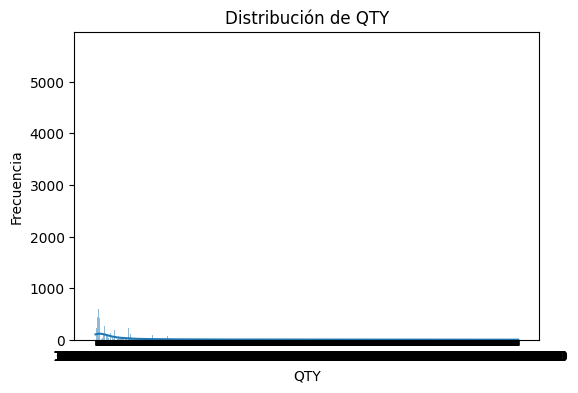

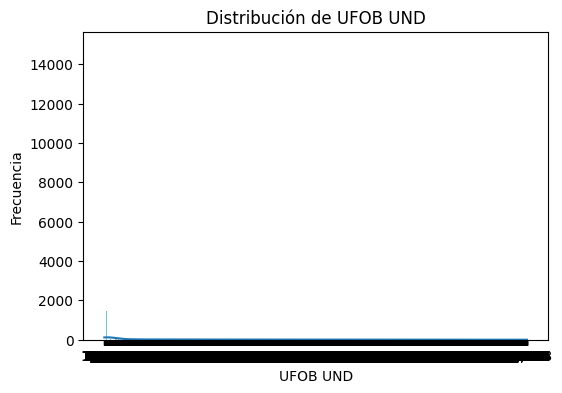

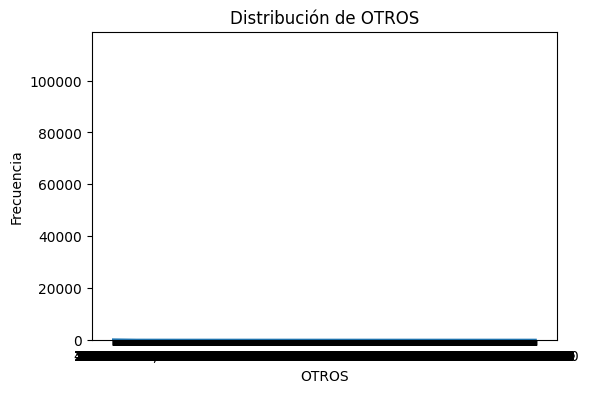

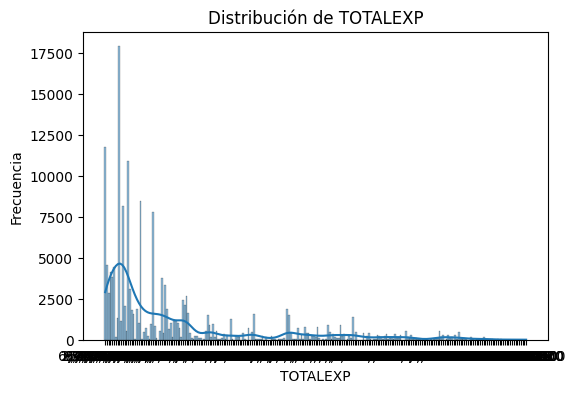

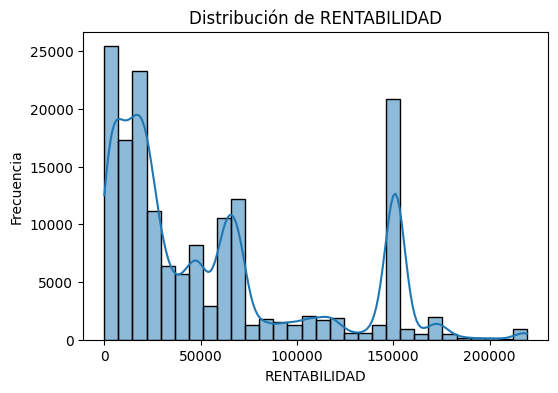

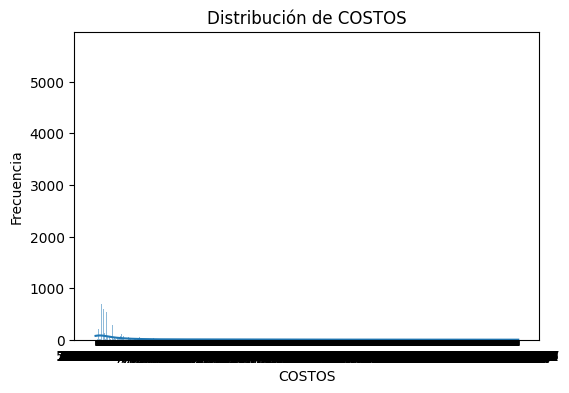

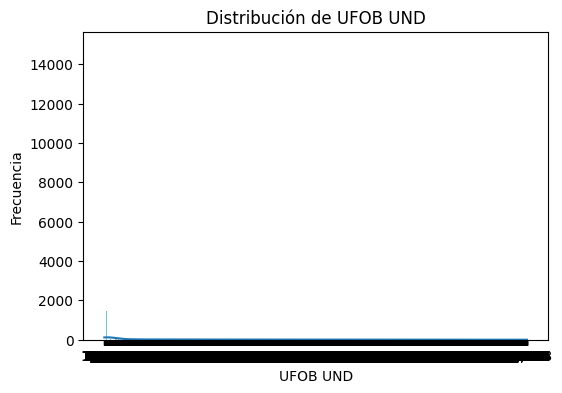

In [ ]:
variables = ['Qty','UFOB Und','Otros','TotalExp' ,'Rentabilidad', 'Costos']
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(datos[var], bins=30, kde=True)
    plt.title(f'Distribución de {var.upper()}')
    plt.xlabel(var.upper())
    plt.ylabel('Frecuencia')
    plt.show()

Se puede apreciar que los atributos Qty, Otros y Costos tienen un sesgo hacia la derecha en su distribución. Respecto al atributo de "Rentabilidad" el cual es el que se clasificará más adelante, se observa una distribución bimodal, la mayor frecuencia se encuentra en rentabildades bajas, mostrando un leve sesgo hacia estos valores.

En primer lugar se agrupan los datos para la columna "Exportador", luege se aplica una agregación a cada grupo, especificamente para la columna de cantidad, y se calcula la media, la media y la desviación estándar, obteniendo una tabla que muestra las estadísticas descriptivas mencionadas.
En segundo lugar se visualiza la distribución de la cantidad exportada por exportador.

                                               Qty                          
                                              mean       median          std
Exportador                                                                  
A5 EXPORT SPA                         100859811.32  96951500.00  74400528.36
ACONCAGUA FOODS S.A.                  270465600.00 200169600.00 311345033.80
AGRIC. COMERC. EXPORT. E IMPOR        113046207.79 150100000.00  72528474.22
AGRICOLA AGROSAN SPA                   25011888.89  26425000.00  15388796.56
AGRICOLA EL CALVARIO S A               18102378.05  12000000.00  20293841.98
...                                            ...          ...          ...
VICTORIA FRUITS SPA                    85740154.07  58800000.00  67380153.47
VINA GARCES SILVA LIMITADA            127949500.00 177637500.00  74067095.73
WATEK AGRICULTURAL GROUP SPA          123243382.35 184000000.00  75450890.87
YI FAN INTERNATIONAL SOCIEDAD ANONIMA  59085490.57  37375000.00  56607313.25

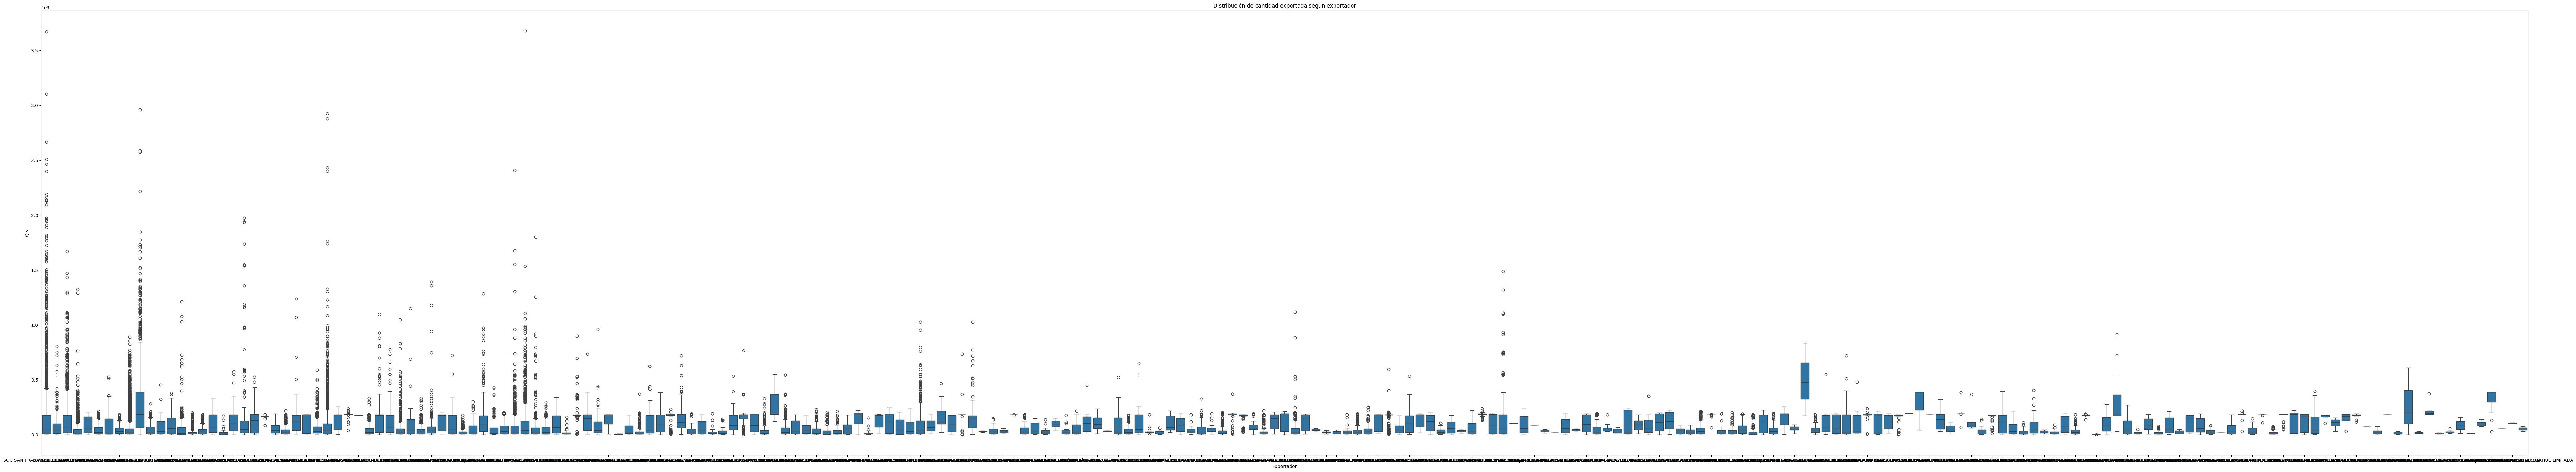

In [ ]:
#Step 4: Aggregation
#Descripción: Para comparar grupos dentro del conjunto de datos, agrupe los datos y calcule estadísticas de resumen como la media, la mediana y la desviación estándar.
grupo_exp = datos.groupby('Exportador').agg({'Qty':['mean', 'median', 'std'],})
print(grupo_exp)

plt.figure(figsize=(100,18))
sns.boxplot(x='Exportador', y='Qty', data=datos)
plt.xlabel('Exportador')
plt.ylabel('Qty')
plt.title('Distribución de cantidad exportada segun exportador')
plt.show()

En el gráfico se aprecia una gran cantidad de valores atípicos

Se realiza el mismo procedimiento que se hizo anteriormente pero ahora se agrupa por la vía de exportación.

                  Qty                         
                 mean      median          std
Via                                           
AÉREO     20581461.44 14400000.00  21275527.78
CARRETERO 38111920.77 15975000.00  51003811.41
MARÍTIMO  85617418.82 46000000.00 114559651.37


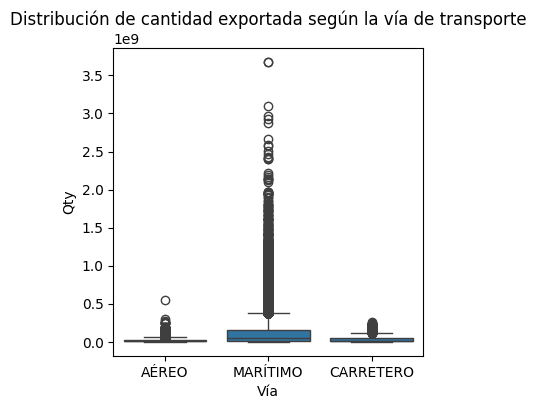

In [ ]:
grupo_exp = datos.groupby('Via').agg({'Qty':['mean', 'median', 'std'],})
print(grupo_exp)

plt.figure(figsize=(4,4))
sns.boxplot(x='Via', y='Qty', data=datos)
plt.xlabel('Vía')
plt.ylabel('Qty')
plt.title('Distribución de cantidad exportada según la vía de transporte')
plt.show()

La vía marítima tiene una mayor dispersión en las cantidades exportadas, con un rango muy amplio que incluye varios valores atípicos. Es la vía que maneja los volúmenes más grandes.
Las vías aéreas y por carretera presentan menor dispersión en las cantidades exportadas, con carretera mostrando menor desviación estándar, lo que indica que la cantidad exportada por esta vía es más consistente.

Se realiza el mismo procedimiento que se hizo anteriormente pero ahora se agrupa por el país de destino que tienen las exportaciones.

                                       Qty                         
                                      mean      median          std
Pais de Destino                                                    
ALEMANIA                       19534181.82 11200000.00  31653865.98
ARABIA SAUDITA                 15990049.75  8880000.00  23148834.67
ARGENTINA                      58929460.58 24100000.00  66544236.40
BOLIVIA                        34287807.70 12300000.00  47729926.93
BRASIL                         36831200.82 12000000.00  53286905.24
BÉLGICA                        11495937.50  9050000.00  13024912.29
CAMBOYA                        18811300.00 13200000.00  21201109.43
CANADÁ                         46044373.85 20064000.00  61777568.94
CHINA                          80035227.86 38400000.00 111738827.94
CHIPRE                          4000000.00  4000000.00         0.00
COLOMBIA                       56785180.65 23575000.00  87281376.32
COREA DEL SUR                  69948432.49 30000

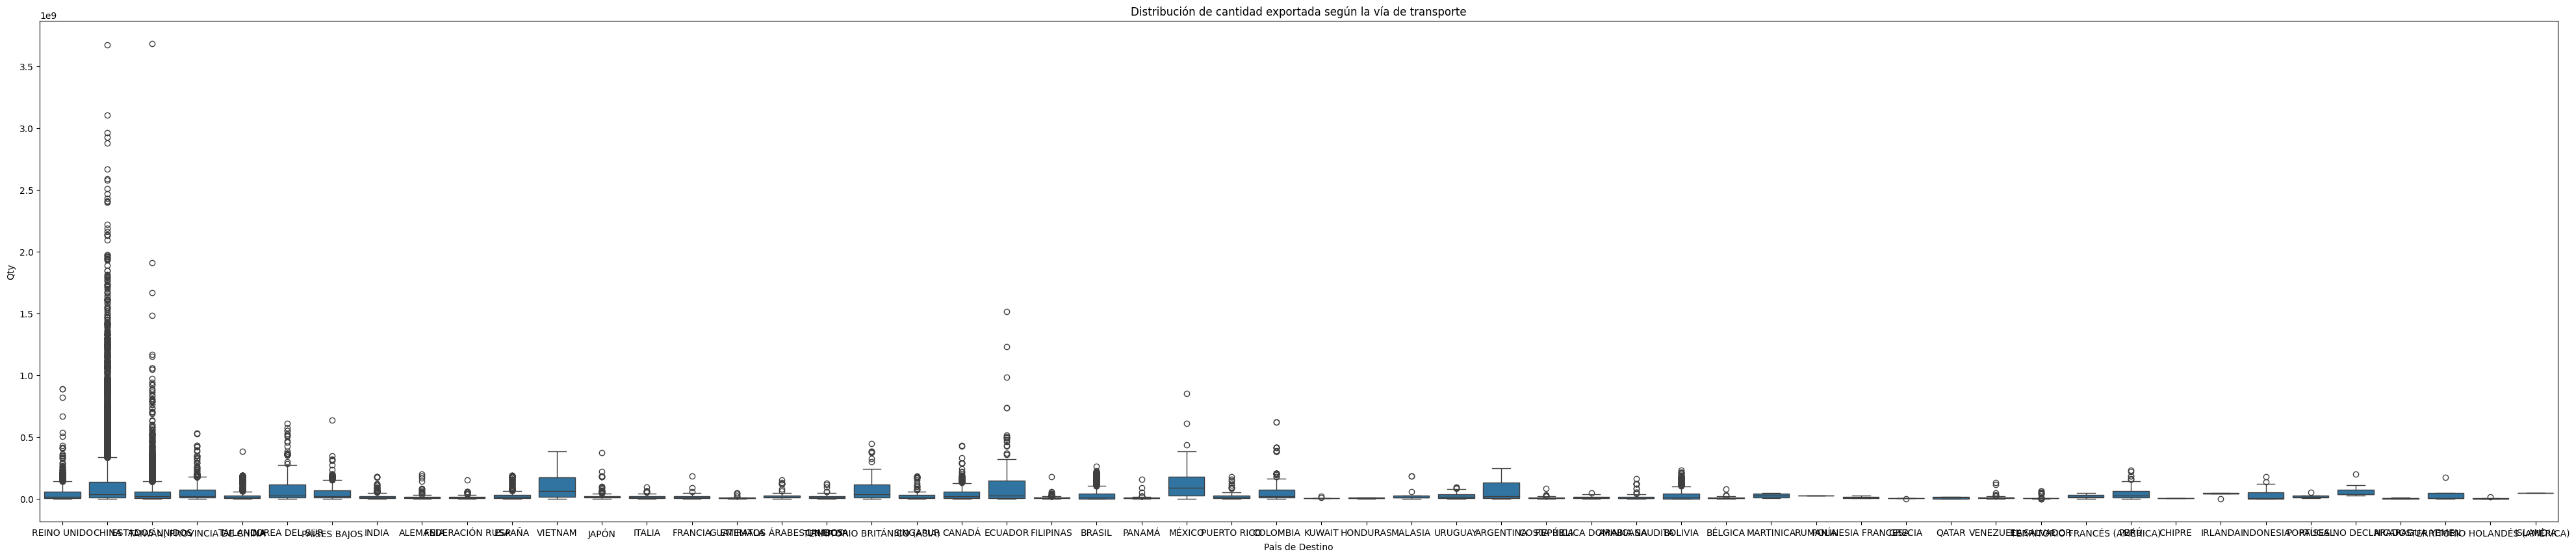

In [ ]:
grupo_exp = datos.groupby('Pais de Destino').agg({'Qty':['mean', 'median', 'std'],})
print(grupo_exp)

plt.figure(figsize=(50,10))
sns.boxplot(x='Pais de Destino', y='Qty', data=datos)
plt.xlabel('PaÍs de Destino')
plt.ylabel('Qty')
plt.title('Distribución de cantidad exportada según la vía de transporte')
plt.show()

Se observa que el país de China es al cual más se exportan cerezas

El código siguiente selecciona y muestra 15 registros aleatorio de los datos, sin permitir que se repitan registros en la muestra. Con el objetivo de obtener una muestra que represente adecuadamente la distribución de los datos. Además, para realizar la experimentación con los modelos de machine learning es útil trabajar con muestras reducidas del conjunto total de datos, para reducir el tiempo de ejecución.

In [ ]:
#Random Sampling without Replacement *Muestreo aleatorio sin reemplazo*
sample_without_replacement = datos.sample(n=15, replace=False)
print("Muestreo aleatorio sin reemplazo:")
print(sample_without_replacement)

Muestreo aleatorio sin reemplazo:
        Partida Aduanera Descripcion de la Partida Aduanera         Aduana  \
74846            8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
137097           8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
136229           8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
30868            8092919   LAS DEMAS CEREZAS DULCES FRESCAS     VALPARAISO   
94598            8092919   LAS DEMAS CEREZAS DULCES FRESCAS      LOS ANDES   
49791            8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
18085            8092919   LAS DEMAS CEREZAS DULCES FRESCAS     VALPARAISO   
112831           8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
50343            8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
50974            8092919   LAS DEMAS CEREZAS DULCES FRESCAS    SAN ANTONIO   
89705            8092919   LAS DEMAS CEREZAS DULCES FRESCAS  METROPOLITANA   
25041            8092919   LAS

El código realiza un análisis de componentes principales (PCA) para reducir la dimensionalidad de la base de datos

<ipython-input-13-efb34d07c144>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


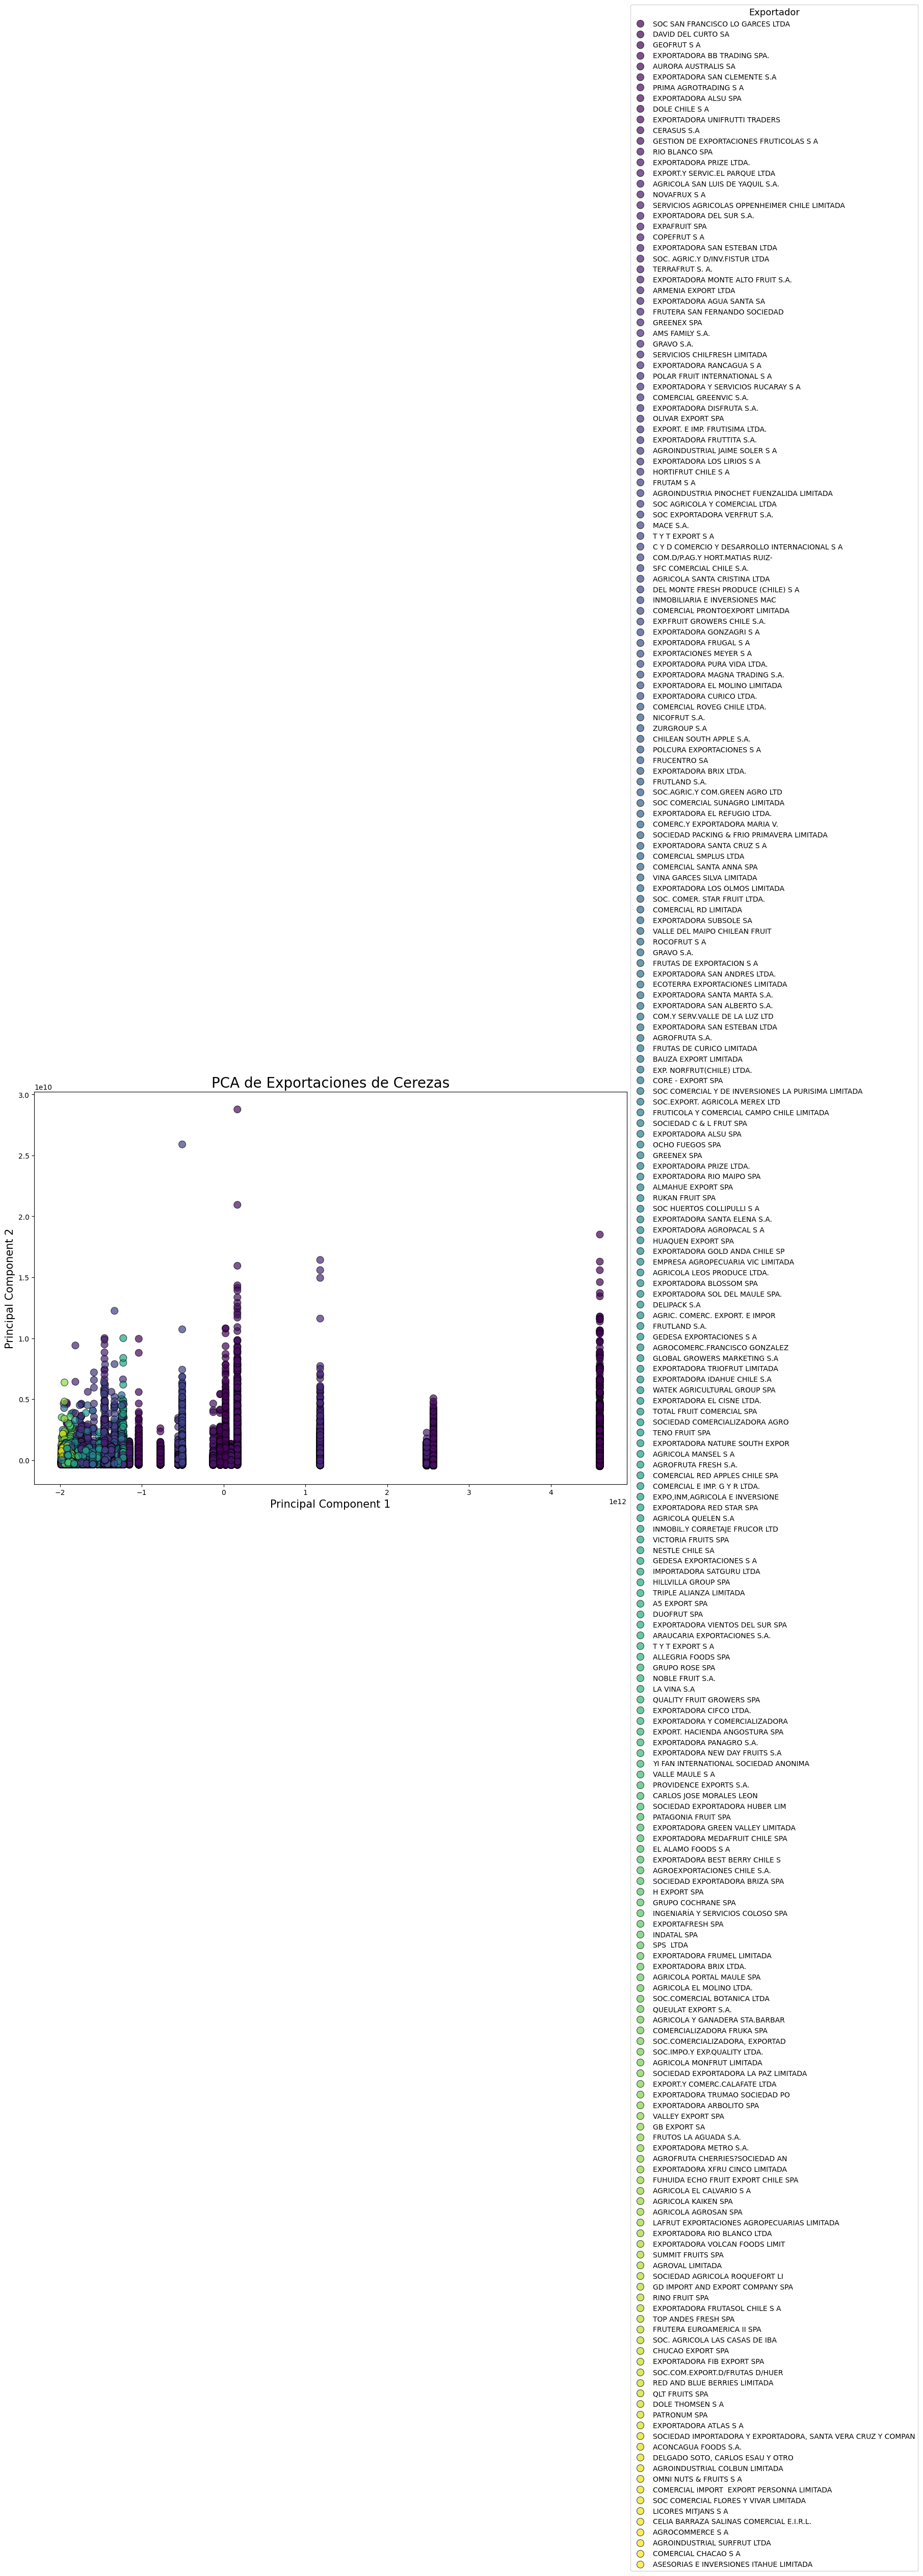

In [ ]:
#Step 6: Attributes
#Descripción: las técnicas de reducción de dimensionalidad como PCA ayudan a representar datos de alta dimensión en dimensiones más bajas. Aquí, tenemos 4 atributos que se recopilan para cada especie: ancho y largo de sépalo, y ancho y largo de pétalo. De estos, queremos determinar cuáles son los 2 componentes principales que definen un tipo de especie

from sklearn.decomposition import PCA

features = ['Qty','U$ FOB Tot','UFOB Und','Valor liquidado','Comisiones','Otros','Valor Clausula','Costos','C+Otros','Qty*USFOB UN','TotalExp','Rentabilidad']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos[features].dropna())

#crea dataframe con datos de pca
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df['Exportador'] = datos['Exportador']
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Exportador', data=pca_df, palette='viridis', s=100, edgecolor='black', alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA de Exportaciones de Cerezas', fontsize=20)
plt.legend(title='Exportador', title_fontsize='13', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Se observan muchos puntos agrupados cerca de los valores más bajos en el eje X (alrededor de -2 a 0), lo que sugiere que la mayoría de las observaciones están relativamente concentradas en una región de baja varianza en el primer componente.
En el eje Y, la mayoría de los puntos se distribuyen en la parte inferior, lo que indica que el segundo componente principal también está capturando una pequeña parte de la varianza, aunque hay algunos puntos que se elevan significativamente por encima del resto.
El primer componente principal, PC1, captura gran parte de la variabilidad de los datos de exportación de cerezas, pero hay una dispersión considerable en valores muy altos, lo que sugiere outliers o valores extremos.
El segundo componente principal, PC2, tiene menor variabilidad en general, pero algunos puntos se extienden hacia valores muy altos.


In [ ]:
#Feature Selection, Discretization and Standardization
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
X = datos[['Qty','U$ FOB Tot','UFOB Und','Valor liquidado','Comisiones','Otros','Valor Clausula','Costos','C+Otros','Qty*USFOB UN','TotalExp']]
y = datos['Rentabilidad']
X = X.dropna()
y = y[X.index]
model = LinearRegression()

In [ ]:
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

In [ ]:
features = X.columns
ranking = rfe.ranking_
feature_ranking = sorted(zip(features, ranking), key=lambda x: x[1])
print("Feature Ranking:")
for feature, rank in feature_ranking:
    print(f"{feature}: {rank}")

Feature Ranking:
UFOB Und: 1
Valor liquidado: 1
Comisiones: 1
Valor Clausula: 1
C+Otros: 1
Otros: 2
U$ FOB Tot: 3
Costos: 4
Qty: 5
Qty*USFOB UN: 6
TotalExp: 7


UFOB Und, Valor liquidado, Comisiones, Valor Clausula y C+Otros son las más importantes para el modelo.

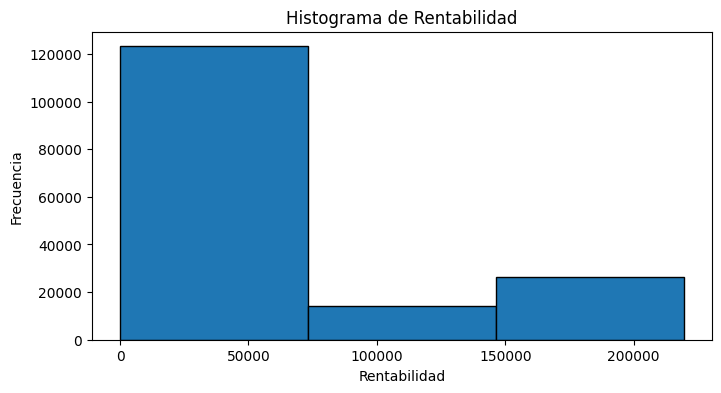

Bordes de las Categorías:
IntervalIndex([(-220.035, 73157.701], (73157.701, 146315.961], (146315.961, 219474.222]], dtype='interval[float64, right]')


In [ ]:
#Discretization
datos['Rentabilidad_binned'] = pd.cut(datos['Rentabilidad'], bins=3)
plt.figure(figsize=(8, 4))
plt.hist(datos['Rentabilidad'], bins=3, edgecolor='black')
plt.title('Histograma de Rentabilidad')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')
plt.show()

print("Bordes de las Categorías:")
print(datos['Rentabilidad_binned'].cat.categories)

Respecto al histograma se puede concluir que la gran concentración de datos en el primer intervalo indica que la mayoría de las observaciones tienen rentabilidades bajas, mientras que solo una pequeña parte de los datos cae en los intervalos de rentabilidad más alta.

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)
scaled_df['Rentabilidad'] = datos['Rentabilidad']
print(scaled_df.describe())

            Qty  U$ FOB Tot  UFOB Und  Valor liquidado  Comisiones     Otros  \
count 163471.00   163471.00 163471.00        163471.00   163471.00 163471.00   
mean      -0.00       -0.00      0.00             0.00       -0.00      0.00   
std        1.00        1.00      1.00             1.00        1.00      1.00   
min       -0.69       -0.64     -2.69            -0.86       -0.05     -0.41   
25%       -0.61       -0.48     -0.65            -0.45       -0.05     -0.41   
50%       -0.39       -0.31      0.02            -0.22       -0.05     -0.41   
75%        0.44        0.19      0.71             0.04       -0.05      0.19   
max       33.62      141.41      2.44            65.70       53.50     39.78   

       Valor Clausula    Costos   C+Otros  Qty*USFOB UN  TotalExp  \
count       163471.00 163471.00 163471.00     163471.00 163471.00   
mean             0.00      0.00     -0.00         -0.00      0.00   
std              1.00      1.00      1.00          1.00      1.00   
min

In [ ]:
#Similaritis and Distances
from scipy.spatial import distance
Cerezas = scaled_df.head(7).drop('Rentabilidad', axis=1)
euclidean_distances = distance.pdist(Cerezas, metric='euclidean')
print("Euclidean Distance:\n", euclidean_distances)
manhattan_distances = distance.pdist(Cerezas, metric='cityblock')
print("Manhattan Distance:\n", manhattan_distances)
maximun_distances = distance.pdist(Cerezas, metric='chebyshev')
print("Maximum Distance:\n", maximun_distances)

Euclidean Distance:
 [4.36742039 5.75742505 5.02313905 5.02430437 6.12973983 5.45637055
 2.37583519 4.00268587 3.99188589 3.32552148 1.67104092 2.98383746
 2.971356   1.68199204 2.04461659 0.10567752 2.52912449 4.44283637
 2.50981055 4.43843387 3.45727248]
Manhattan Distance:
 [ 9.88467648 11.6228078   9.69975981  9.8225144  13.0063638  12.78930212
  5.65921535  9.79661162  9.70935162  7.43373843  5.08317712  6.55460415
  6.46734415  2.29403216  5.71663969  0.12275459  4.59787051 10.09175615
  4.51061051 10.00449615  8.01067185]
Maximum Distance:
 [2.44695617 3.67312547 3.17640256 3.17640256 3.67312547 3.09932644
 1.2261693  2.36208309 2.36208309 2.41561897 0.65237028 2.32811739
 2.32811739 1.6426209  1.34163478 0.1050073  2.32811739 2.89149591
 2.32811739 2.89149591 2.98425568]


A continuación, se contruye la matriz de correlación para identificar y cuantificar las relaciones lineales entre los atributos, mostrando su dirección (positiva, negativa o nula) y fuerza (valores entre -1 y 1). Es útil para detectar multicolinealidad y explorar relaciones iniciales en un conjunto de datos, facilitando análisis y modelos predictivos más robustos.








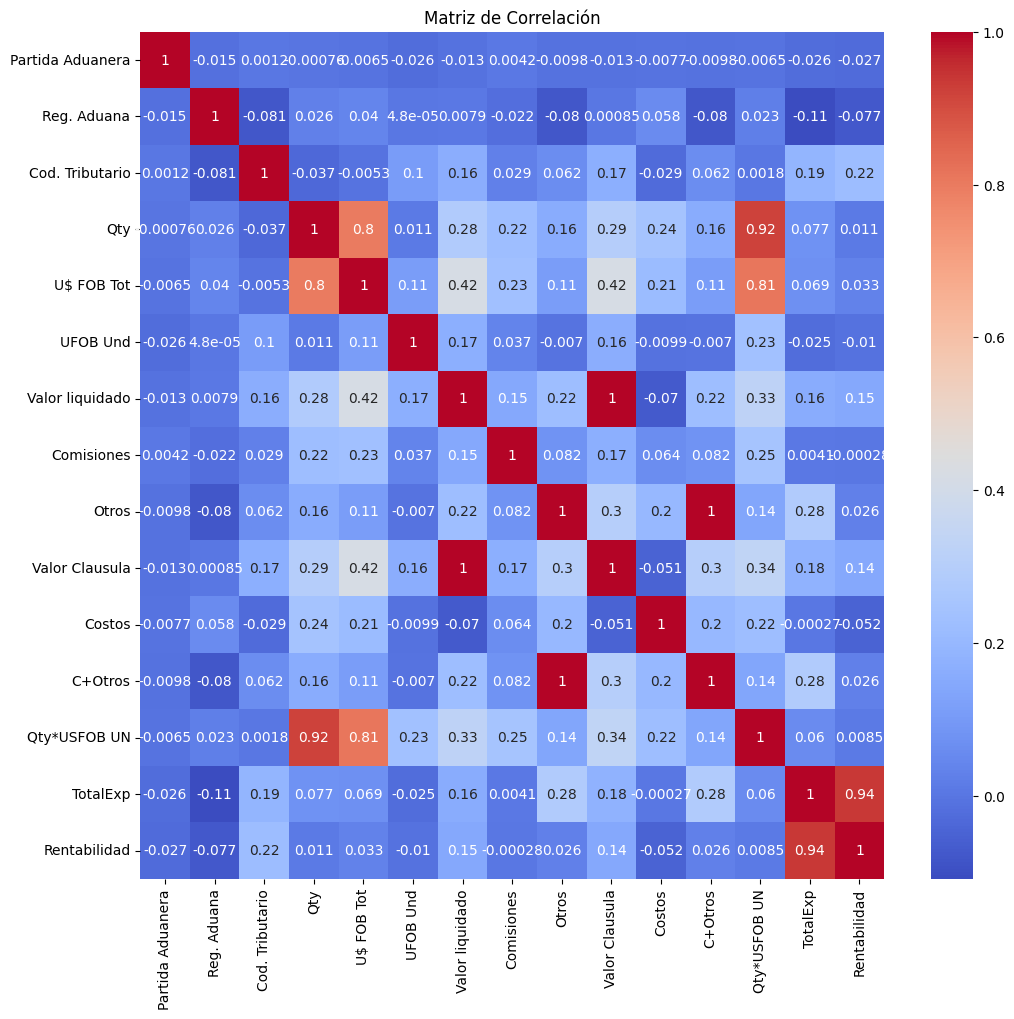

In [ ]:
#Matriz de correlación
numeric_cols = datos.select_dtypes(include=np.number).columns
corr_matrix = datos[numeric_cols].corr()

plt.figure(figsize=(12, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Se puede observar que Rentabilidad tiene una correlación alta con TotalExp (0.94), lo que implica que la rentabilidad depende fuertemente de los gastos totales. Además, se aprecia una debil correlación entre las otras variables.


In [ ]:
#Estimación de Kernel
from scipy.stats import gaussian_kde

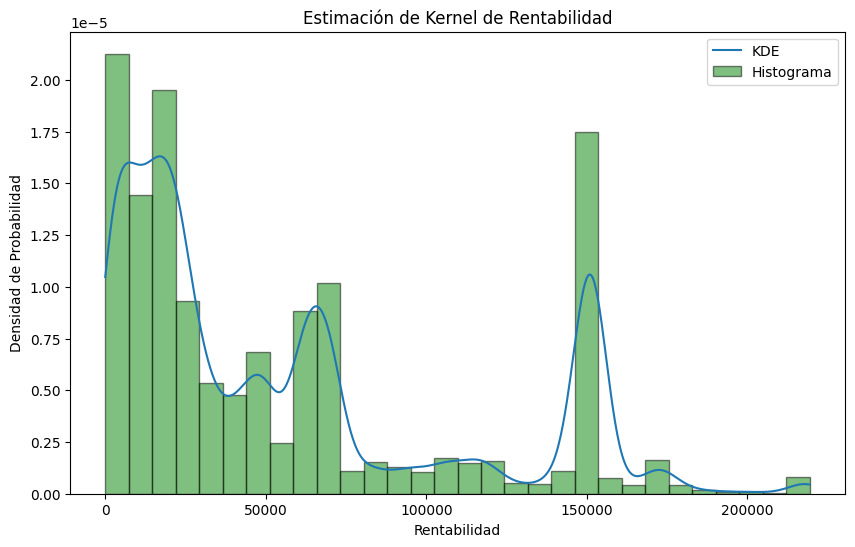

In [ ]:
filetered_rentabilidad = datos['Rentabilidad'][np.isfinite(datos['Rentabilidad'])]
kde = gaussian_kde(filetered_rentabilidad)
x = np.linspace(min(filetered_rentabilidad), max(filetered_rentabilidad), 1000)
y = kde(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='KDE')
plt.hist(filetered_rentabilidad, bins=30, density=True, alpha=0.5, color='g', edgecolor='black', label='Histograma')
plt.title('Estimación de Kernel de Rentabilidad')
plt.xlabel('Rentabilidad')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

La rentabilidad presenta una distribución no uniforme, con una mayor concentración de observaciones cercanas a 0 y un segundo grupo significativo alrededor de 150,000. Esto indica que hay dos segmentos o grupos dentro de los datos, uno con rentabilidades bajas y otro con rentabilidades altas.


<font color="purple" size="5">MODELOS DE MACHINE LEARNING</font>


A continuación, se presentará todo el proceso requerido para aplicar algoritmos de machine learning, en este caso Support Vector Machine y Árbol de decisión, con el fin de clasificar la rentabilidad de cada exportación respecto a las exportaciones totales de cada exportador que se encuentra en el conjunto de datos


El siguiente bloque de código importa herramientas y bibliotecas necesarias para el preprocesamiento, entrenamiento y la evaluación de los modelos de clasificación. StandardScaler se utiliza para escalar las características de los datos, asegurando que todas tengan una escala similar, lo cual es importante para el SVM. El SVC corresopnde a Support Vector Machine, el cual es un modelo de clasificación basado en máquinas de soporte vectorial, que busca encontrar el hiperplano óptimo para separar las clases en los datos. Además, se importan herramientas para evaluar el rendimiento del modelo, como el classification_report y la confusion_matrix, que permiten obtener métricas detalladas sobre la precisión del modelo y sus errores. Finalmente, el DecisionTreeClassifier y el módulo tree proporcionan herramientas para entrenar y visualizar árboles de decisión, un modelo interpretativo que clasifica los datos dividiéndolos en función de ciertas condiciones.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
# Convertir la columna 'Rentabilidad' a numérica, forzando errores a NaN
datos['Rentabilidad'] = pd.to_numeric(datos['Rentabilidad'], errors='coerce')

En las siguientes líneas de código, los atributos categóricos son transformados a un formato que puedan leer los algoritmos:

In [6]:
to_get_dummies_for = ['Pais de Destino', 'Tipo de Bulto', 'Nave']
datos = pd.get_dummies(data = datos, columns = to_get_dummies_for, drop_first = True)

Se seleccionan los atributos que se utilizarán para cada algoritmo, ya que, SVM trabaja mejor con datos númericos, sino su tiempo de ejecución es muy extenso.

In [7]:
# Seleccionar los atributos para el modelo
atributos_seleccionados_svm = ['C+Otros','TotalExp']
atributos_seleccionados_dt = ['TotalExp'] + [col for col in datos.columns if 'Pais de Destino_' in col or 'Tipo de Bulto_' in col or 'Nave_' in col]


Para categorizar la rentabilidad en las clase baja, media y alta se utiliza pd.qcut

In [8]:
# Crear las categorías de rentabilidad baja, media, alta
y = datos['Rentabilidad'].dropna()
y_categorico = pd.qcut(y, q=3, labels=['Baja', 'Media', 'Alta'])

<ipython-input-9-08d5e3ed4093>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_categorico, palette='viridis')


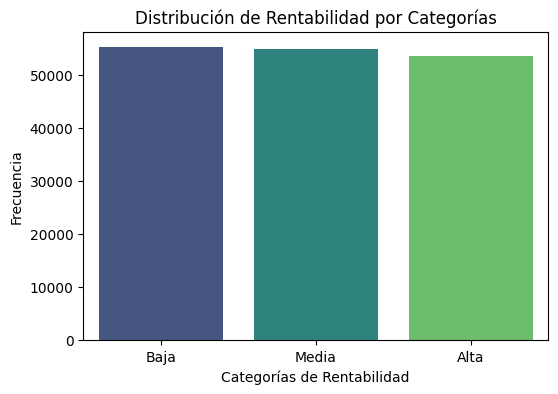

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_categorico, palette='viridis')
plt.title('Distribución de Rentabilidad por Categorías')
plt.xlabel('Categorías de Rentabilidad')
plt.ylabel('Frecuencia')
plt.show()

Se puede apreciar gracias al gráfico que la distribución de las categorías es equilibrada.

Ahora se preparan los datos para aplicarlos en los algoritmos, diviendo entre las variables independientes y las dependientes.

In [10]:
# Preparar los datos
datos_completos_svm = pd.concat([datos[atributos_seleccionados_svm], y_categorico], axis=1).dropna()
X_svm = datos_completos_svm[atributos_seleccionados_svm]
Y_svm = datos_completos_svm['Rentabilidad']

In [11]:
datos_completos_dt = pd.concat([datos[atributos_seleccionados_dt], y_categorico], axis=1).dropna()
X_dt = datos_completos_dt[atributos_seleccionados_dt]
Y_dt = datos_completos_dt['Rentabilidad']

A continuación, se dividirán los datos de entrenamiento y de prueba del modelo, dejando un 75% de los datos para entrenamiento y un 15% para realizar pruebas.

In [12]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, Y_svm, test_size=0.15, random_state=42)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, Y_dt, test_size=0.15, random_state=42)

Se realiza la estandarización de los datos:

In [13]:
sc = StandardScaler()
X_train_svm = X_train_svm.replace({'\.': '', ',': '.'}, regex=True).astype(float)
X_test_svm = X_test_svm.replace({'\.': '', ',': '.'}, regex=True).astype(float)
X_train_svm = pd.DataFrame(sc.fit_transform(X_train_svm), columns=X_train_svm.columns)
X_test_svm = pd.DataFrame(sc.transform(X_test_svm), columns=X_test_svm.columns)

X_train_dt = X_train_dt.replace({'\.': '', ',': '.'}, regex=True).astype(float)
X_test_dt = X_test_dt.replace({'\.': '', ',': '.'}, regex=True).astype(float)
X_train_dt = pd.DataFrame(sc.fit_transform(X_train_dt), columns=X_train_dt.columns)
X_test_dt = pd.DataFrame(sc.transform(X_test_dt), columns=X_test_dt.columns)

Se construye la matriz de confusión con el objetivo de visualizar el desempeño del modelo, calcular las métricas de rendimiento y diagnosticar errores de los modelos.

In [14]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

<font color="blue" size="5">SUPPORT VECTOR MACHINE</font>



Entrenamiento con SVM
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00     45503
        Baja       0.94      1.00      0.97     46851
       Media       1.00      0.94      0.97     46596

    accuracy                           0.98    138950
   macro avg       0.98      0.98      0.98    138950
weighted avg       0.98      0.98      0.98    138950



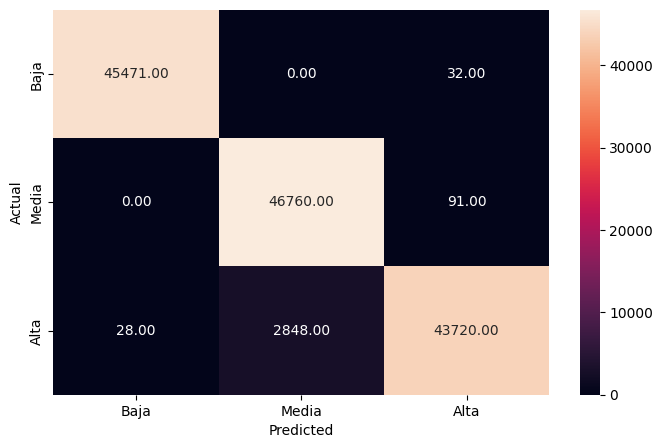

              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00      7970
        Baja       0.95      1.00      0.97      8384
       Media       1.00      0.94      0.97      8167

    accuracy                           0.98     24521
   macro avg       0.98      0.98      0.98     24521
weighted avg       0.98      0.98      0.98     24521



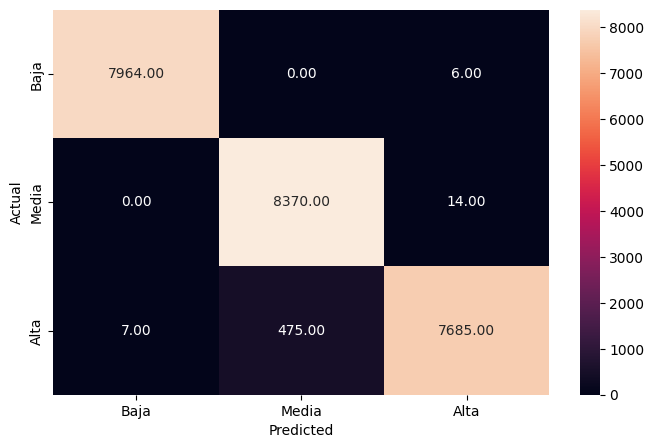

Precisión del modelo SVM: 0.9795277517230129


In [15]:
print("Entrenamiento con SVM")
clf_svm = SVC(kernel='poly').fit(X_train_svm, y_train_svm)
y_pred_train_svm = clf_svm.predict(X_train_svm)
metrics_score(y_train_svm, y_pred_train_svm)

y_pred_test_svm = clf_svm.predict(X_test_svm)
metrics_score(y_test_svm, y_pred_test_svm)

print("Precisión del modelo SVM:", clf_svm.score(X_test_svm, y_test_svm))

En base al accuracy, se puede inferir que tiene una exactitud de 98% el modelo, tiene un rendimiento equilibrado en todas las clases y es consistente con sus predicciones.
Respecto a la matriz de confusión de entrenamiento se puede observar que el modelo tiene ligeros problemas para distinguir entre las clases “Media” y “Alta”. Respecto a las clasificaciones de la clase “Baja”, sólo 32 casos fueron predichos erróneamente, en la clase “Media” 91 valores no se clasificaron correctamente y en la clase “Alta” se ven mayores casos equívocos de predicción, lo que significa que las métricas de rendimiento no son consistentes con la matriz de confusión, el recall debería ser 0.94 y el F1-score debería ser aproximadamente 0.97
En base a la matriz de confusión de prueba, el modelo predijo correctamente 7.964 casos de la clase “Baja”, teniendo solo 6 errores de clasificación. Respecto a la clase “Media”, el modelo estimó 8.370 valores correctamente, y clasificó 14 datos como “Alta”. En la clase “Alta” se ve una mayor cantidad de errores en las predicciones, teniendo un total de 482 valores, se observa que al modelo le es difícil distinguir entre clase “Media” y “Alta”.  


<font color="green" size="5">ÁRBOL DE DECISIÓN</font>

Entrenamiento con Árbol de Decisión
              precision    recall  f1-score   support

        Alta       0.96      0.98      0.97     45503
        Baja       0.99      0.99      0.99     46851
       Media       0.97      0.95      0.96     46596

    accuracy                           0.97    138950
   macro avg       0.97      0.97      0.97    138950
weighted avg       0.97      0.97      0.97    138950



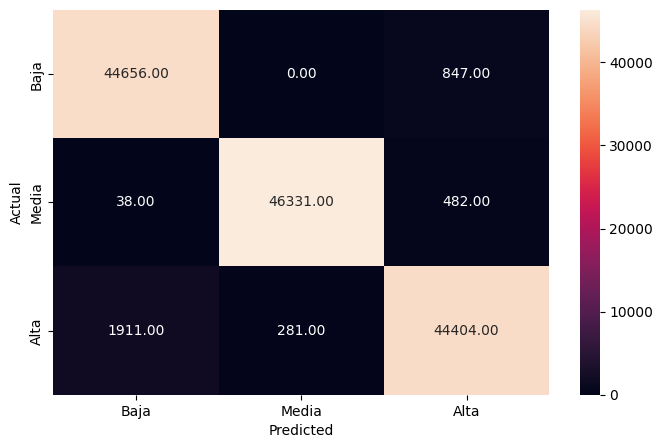

              precision    recall  f1-score   support

        Alta       0.96      0.98      0.97      7970
        Baja       0.99      0.98      0.99      8384
       Media       0.97      0.95      0.96      8167

    accuracy                           0.97     24521
   macro avg       0.97      0.97      0.97     24521
weighted avg       0.97      0.97      0.97     24521



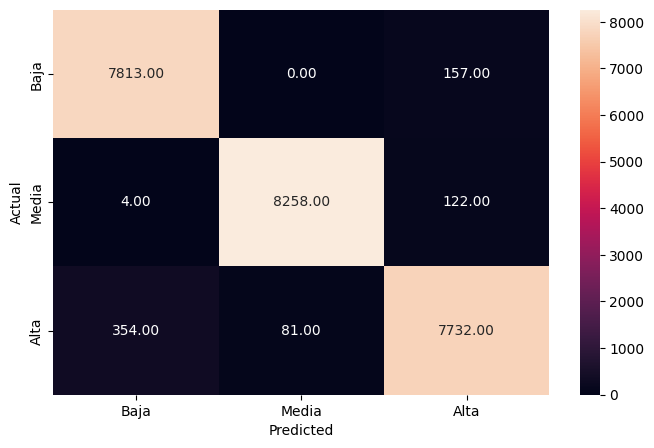

Precisión del modelo Árbol de Decisión: 0.9707189755719587


In [16]:
print("Entrenamiento con Árbol de Decisión")
clf_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf_dt.fit(X_train_dt, y_train_dt)

y_pred_train_dt = clf_dt.predict(X_train_dt)
metrics_score(y_train_dt, y_pred_train_dt)

y_pred_test_dt = clf_dt.predict(X_test_dt)
metrics_score(y_test_dt, y_pred_test_dt)

print("Precisión del modelo Árbol de Decisión:", clf_dt.score(X_test_dt, y_test_dt))

La exactitud del modelo de entrenamiento es del 97%, lo que indica un buen rendimiento.  Clasifica correctamente todas las clases, con rangos similares entre las 3.
En la matriz de entrenamiento las filas indican a los valores reales y las columnas las predicciones hechas por el modelo. Respecto a la clase “Baja” 44.656 fueron predicciones correctas, y 847 fueron clasificados como clase “Alta” erróneamente, en relación con la clase “Media” se realizaron 46.331 clasificaciones correctamente, y 520 clasificaciones fueron erróneas, 38 fueron clasificadas como “Baja” y 482 como “Alta”, de las predicciones de la clase “Alta”, 44.404 casos fueron clasificados correctamente, pero 2.192 fueron predichas de forma errónea, 1911 fueron clasificadas como “Baja” y 281 como “Media”. El modelo trabaja bien, pero está confundiendo en gran cantidad las clases “Baja” y “Alta”.  
En la matriz de prueba, para el caso de la clase “Baja” 7813 fueron clasificados correctamente, 0 fueron clasificados como clase “Media” y 157 fueron clasificados erróneamente como “Altas”, respecto a la clase “Media” se realizaron 8258 clasificaciones correctas, 4 fueron clasificadas erróneamente como clase “Baja” y 122 de las predicciones fueron clasificadas de forma errónea como “Altas”, en relación con las clasificaciones de clase “Alta”, 7732 fueron clasificadas correctamente, pero 354 fueron clasificadas erróneamente como clase “Baja” y 81 como “Media”.


Con el siguiente código se muestran las importancias del árbol de decisión

<ipython-input-31-bace35cf6e1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_9_importance_df.Importance, y=top_9_importance_df.index, palette="viridis")


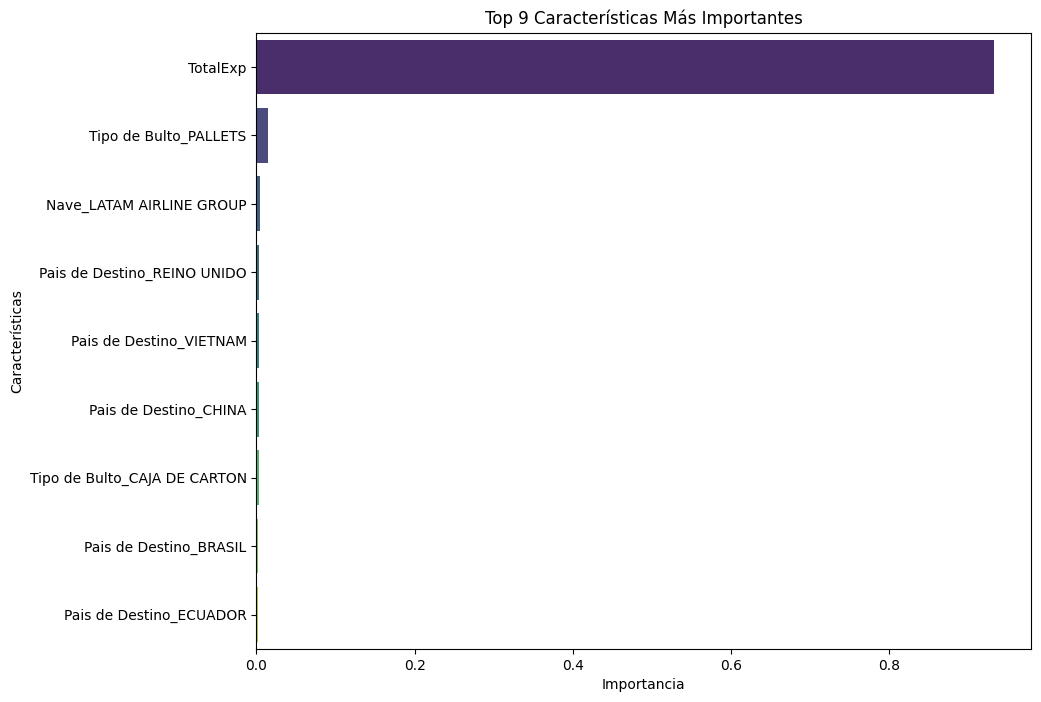

In [ ]:
top_9_importance_df = importance_df.head(9)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_9_importance_df.Importance, y=top_9_importance_df.index, palette="viridis")
plt.title('Top 9 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

El modelo depende principalmente de TotalExp, mientras que las demás características tienen un impacto limitado. Esto se da principalmente por la estrecha relación entre TotalExp y Rentabilidad

A continuación se presenta el árbol de decisión generado para este modelo

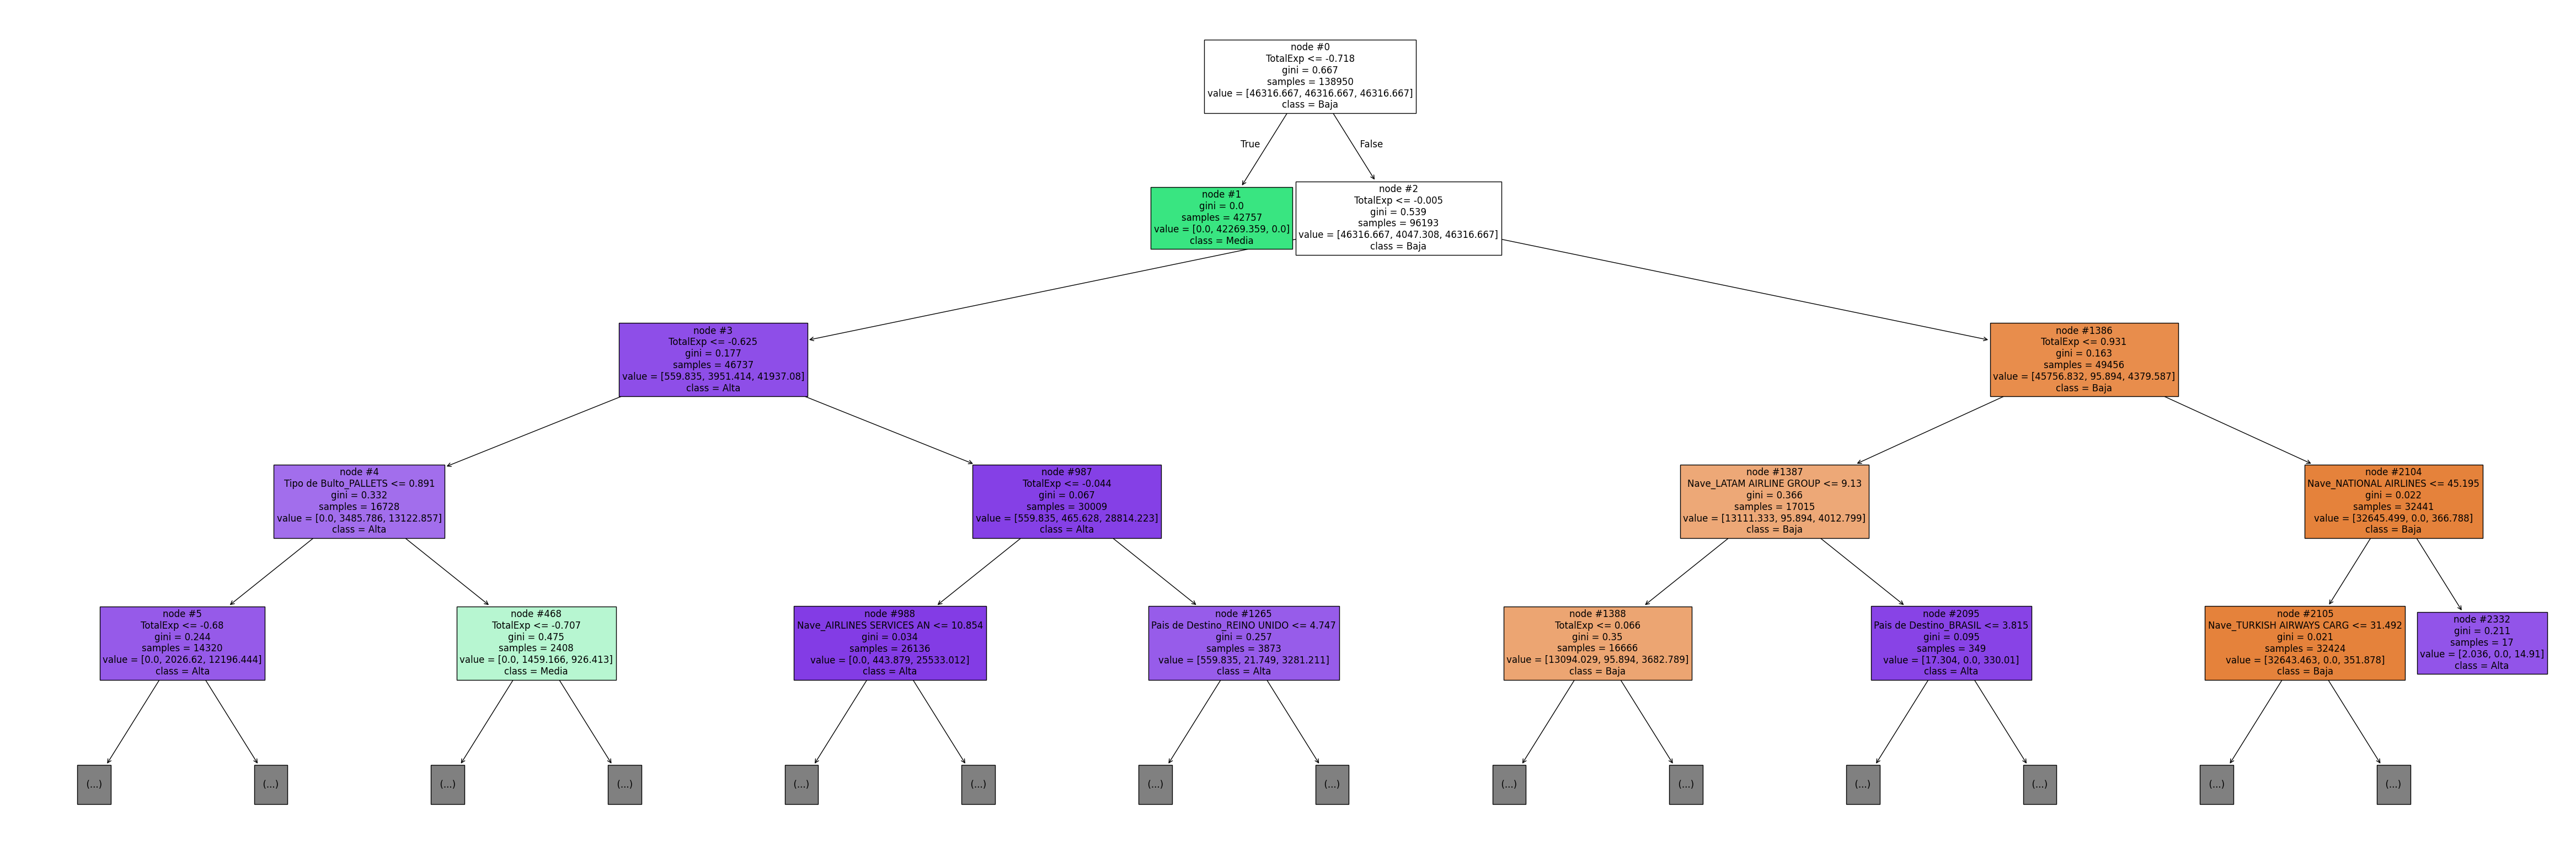

In [ ]:
plt.figure(figsize=(60, 20))
tree.plot_tree(clf_dt, max_depth=4, feature_names=X_dt.columns, filled=True, fontsize=12, node_ids=True, class_names=['Baja', 'Media', 'Alta'])
plt.show()

<font color="black" size="4">CURVAS ROC-AUC</font>

Las curvas ROC sirven para evaluar el desempeño de los algoritmos aplicados en este proyecto. Mide la proporción de falsos positovs sobre todos los negativos reales y la proporción de verdaderos positivos sobre todo los positivos reales. El área bajo la curva mide el desempeño global que tenga el modelo, por ejemplo un AUC de 1 indica que el modelo es perfecto, mientras que un valor de 0.5 indica que el modelo no discrimina mejor que el azar.

El siguiente bloque de texto importa las funciones para calcular las métricas de la curva ROC. label_binarize convierte las etiquetas de las clases en formato binario para calcular las curvas. roc_curve calcula los puntos necesarios para trazar la curva, la función roc_auc_score entrega el valor agregado del AUC. OnveVsRestClassifier entrena los modelos de clasificación para cada clase en un problema multiclase utilizando la estrategia "uno contra el resto".

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

A continuación, se binarizan las etiquetas de los dos algortimos

In [18]:
lb = LabelBinarizer()
y_test_svm_bin = lb.fit_transform(y_test_svm)
y_test_dt_bin = lb.transform(y_test_dt)


El tener probability=true permite que el modelo calcule las probabilidades de pertenencia a cada clase en SVM:

In [19]:
clf_svm = SVC(kernel='poly', probability=True, random_state=42).fit(X_train_svm, y_train_svm)
y_proba_svm = clf_svm.predict_proba(X_test_svm)

Con el modelo entrenado, se calculan las probabilidades de pertenencia a cada clase para los datos de prueba, y estas probabilidades se almacenan en y_proba_dt

In [20]:
clf_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42).fit(X_train_dt, y_train_dt)
y_proba_dt = clf_dt.predict_proba(X_test_dt)

El código siguiente establece las estructuras necesarias para calcular las métricas relacionadas con la curva ROC para cada clase en un problema multiclase. Primero, se determina el número de clases (n_classes) utilizando la cantidad de columnas en el conjunto de etiquetas binarizadas (y_test_svm_bin). Luego, se inicializan diccionarios vacíos (fpr_svm, tpr_svm y roc_auc_svm) para almacenar la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR) y el área bajo la curva (AUC) para cada clase del modelo SVM. De manera similar, se crean los diccionarios (fpr_dt, tpr_dt y roc_auc_dt) para almacenar estas mismas métricas en el modelo de Árbol de Decisión.

In [21]:
n_classes = y_test_svm_bin.shape[1]
fpr_svm, tpr_svm, roc_auc_svm = {}, {}, {}
fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}


Este código calcula las curvas ROC y el área bajo la curva para cada clase de los modelos SVM y Árbol de Decisión. Para cada clase, utiliza la función roc_curve para obtener la tasa de falsos positivos y la tasa de verdaderos positivos comparando las etiquetas reales binarizadas con las probabilidades predichas. Finalmente, calcula el AUC para cada clase utilizando la función auc.

In [22]:
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_svm_bin[:, i], y_proba_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_dt_bin[:, i], y_proba_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])


In [23]:
#Macro promedio
roc_auc_svm['macro'] = roc_auc_score(y_test_svm_bin, y_proba_svm, average='macro', multi_class='ovo')
roc_auc_dt['macro'] = roc_auc_score(y_test_dt_bin, y_proba_dt, average='macro', multi_class='ovo')

In [24]:
# Micro promedio
roc_auc_svm['micro'] = roc_auc_score(y_test_svm_bin, y_proba_svm, average='micro', multi_class='ovo')
roc_auc_dt['micro'] = roc_auc_score(y_test_dt_bin, y_proba_dt, average='micro', multi_class='ovo')


Ahora se graficarán las curvas ROC

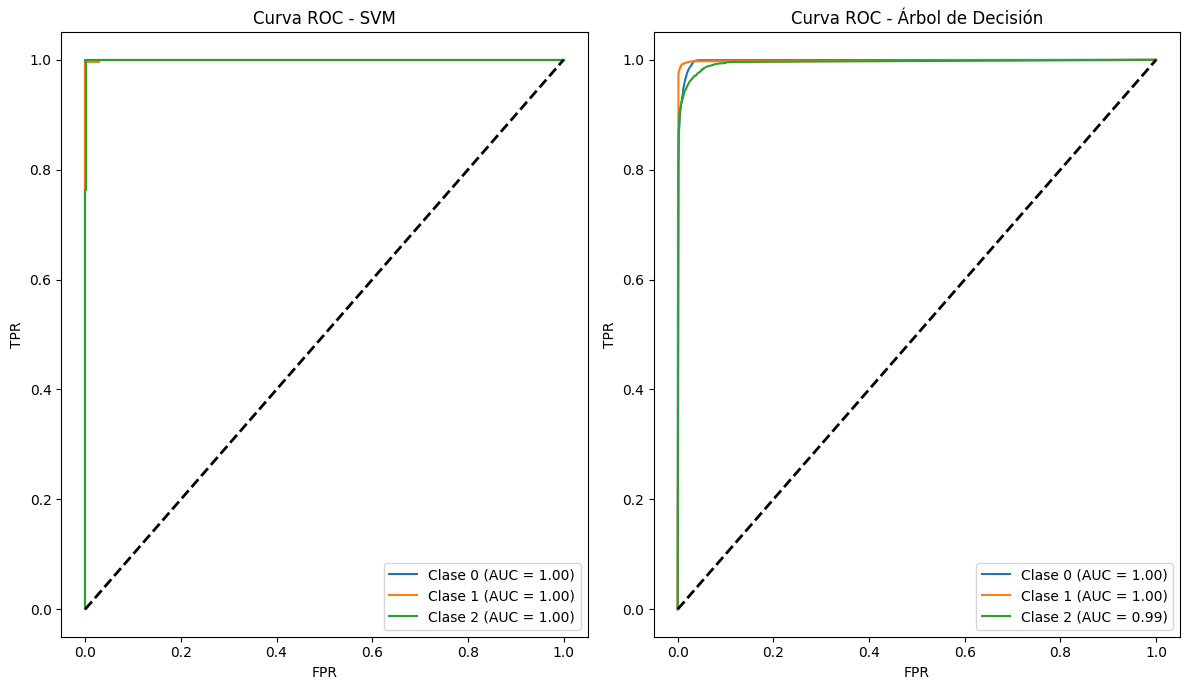

In [28]:

plt.figure(figsize=(12, 7))

# SVM
plt.subplot(1, 2, 1)
for i in range(n_classes):
    plt.plot(fpr_svm[i], tpr_svm[i], label=f'Clase {i} (AUC = {roc_auc_svm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Curva ROC - SVM')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Árbol de Decisión
plt.subplot(1, 2, 2)
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Clase {i} (AUC = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Curva ROC - Árbol de Decisión')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.tight_layout()
plt.show()

Respecto al desempeño de SVM, el modelo tiene un comportamiento casi perfecto en la discriminación entre las clases, lo cual coincide con las métricas de precisión y recall. <br>
<br>
En relación al rendimiento de árbol de decisión, discrimina casi correctamente todas las clases, pero tiene un desempeño inferior para la clase 2 en comparación con el SVM, con un valor de 0,99. <br>
<br>
Comparando ambos modelos, el algoritmo de SVM es el más preciso, teniendo un desempeño mayor tanto en entrenamiento como en prueba, el tener la curva ROC ajustada completamente a la esquina superior izquierda confirma su desempeño óptimo. <br>
<br>
En base a esto, SVM sería la mejor opción para obtener la máxima precisión.

<ipython-input-32-42aeffe85ac5>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='#424242')  # Diagonal gris oscuro más visible
<ipython-input-32-42aeffe85ac5>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='#424242')  # Diagonal gris oscuro más visible


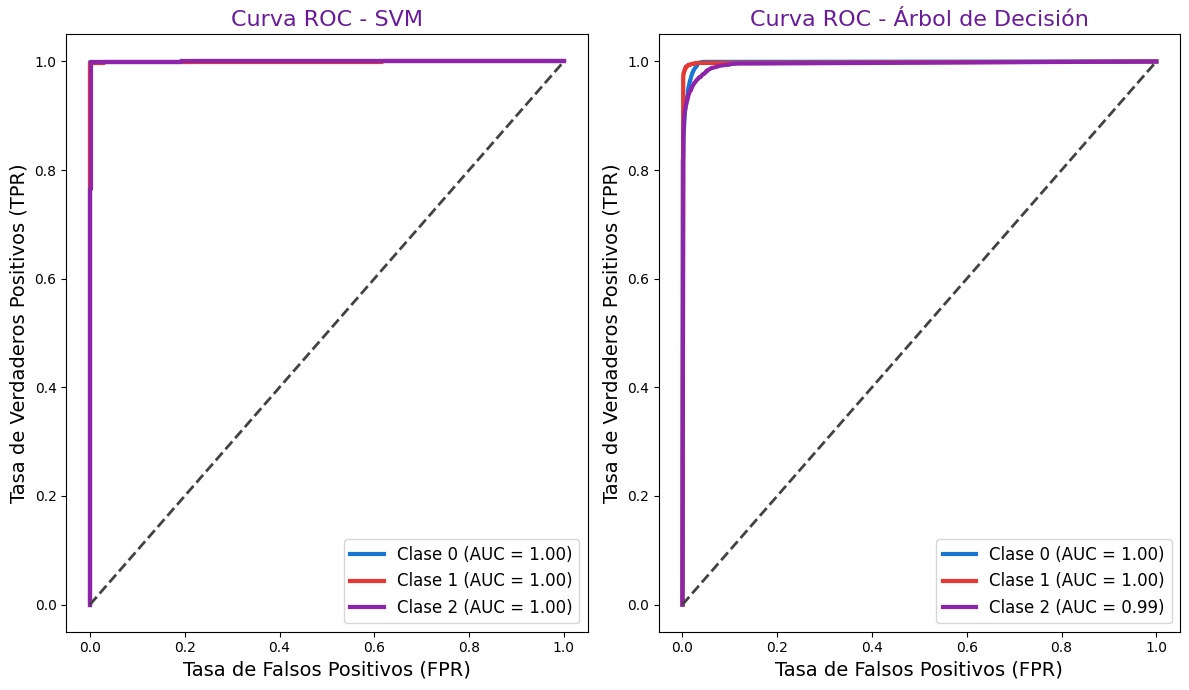

In [32]:
import matplotlib.pyplot as plt

# Paleta de colores más vibrantes
colores = ['#1976D2', '#E53935', '#8E24AA', '#00897B']  # Azul fuerte, rojo, morado, verde

plt.figure(figsize=(12, 7))

# Curva ROC - SVM
plt.subplot(1, 2, 1)
for i in range(n_classes):
    plt.plot(
        fpr_svm[i],
        tpr_svm[i],
        label=f'Clase {i} (AUC = {roc_auc_svm[i]:.2f})',
        color=colores[i % len(colores)],
        lw=3  # Líneas más gruesas
    )
plt.plot([0, 1], [0, 1], 'k--', lw=2, color='#424242')  # Diagonal gris oscuro más visible
plt.title('Curva ROC - SVM', fontsize=16, color='#6A1B9A')  # Título en morado oscuro más grande
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.legend(fontsize=12)  # Leyenda más legible

# Curva ROC - Árbol de Decisión
plt.subplot(1, 2, 2)
for i in range(n_classes):
    plt.plot(
        fpr_dt[i],
        tpr_dt[i],
        label=f'Clase {i} (AUC = {roc_auc_dt[i]:.2f})',
        color=colores[i % len(colores)],
        lw=3  # Líneas más gruesas
    )
plt.plot([0, 1], [0, 1], 'k--', lw=2, color='#424242')  # Diagonal gris oscuro más visible
plt.title('Curva ROC - Árbol de Decisión', fontsize=16, color='#6A1B9A')  # Título en morado oscuro más grande
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=14)
plt.legend(fontsize=12)  # Leyenda más legible

plt.tight_layout()
plt.show()
